## Comparison

For explanation on metrics (visual) go to: 
https://cs.hse.ru/data/2015/05/14/1098547089/4._Centrality_Metrics.pdf

In [1]:
import pandas as pd
from matplotlib.pyplot import *

In [2]:
df=pd.read_csv('centrality.csv')
print df.head()

  Unnamed: 0      Flux    FluxIn   FluxOut     Closeness  EigenCentrality  \
0     C4PAN1  0.000156  0.000141  0.000161  1.528357e-07     4.281338e-20   
1     C4PAN2  0.000027  0.000024  0.000027  1.539719e-07     8.844706e-21   
2     C4PAN3  0.000071  0.000064  0.000074  1.534369e-07     2.328611e-20   
3     C4PAN5  0.000015  0.000014  0.000015  1.542056e-07     4.928116e-21   
4     C4PAN6  0.003814  0.003404  0.003991  1.204346e-07     8.585560e-19   

   PageRank  Betweenness  Authorities          Hubs  
0  0.038055     0.000000     0.000024  1.864885e-09  
1  0.033588     0.000000     0.000071  3.450684e-10  
2  0.026510     0.000000     0.000034  1.058070e-09  
3  0.022957     0.002551     0.000040  3.538499e-11  
4  0.136981     0.000000     0.000887  5.736544e-08  


In [3]:
print df.columns
df.index
d = [i[:2]+i[-3:] for i in df.columns]
d[0]='Names'
df.columns=d
df.index=df.Names
df.columns


Index([u'Unnamed: 0', u'Flux', u'FluxIn', u'FluxOut', u'Closeness',
       u'EigenCentrality', u'PageRank', u'Betweenness', u'Authorities',
       u'Hubs'],
      dtype='object')


Index([u'Names', u'Fllux', u'FlxIn', u'FlOut', u'Cless', u'Eiity', u'Paank',
       u'Beess', u'Auies', u'Huubs'],
      dtype='object')

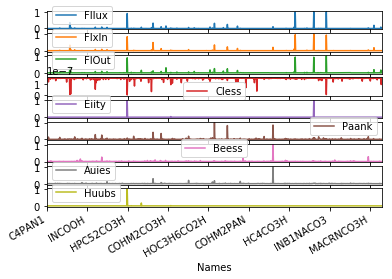

In [4]:
df.plot(x='Names',subplots=True)
show()

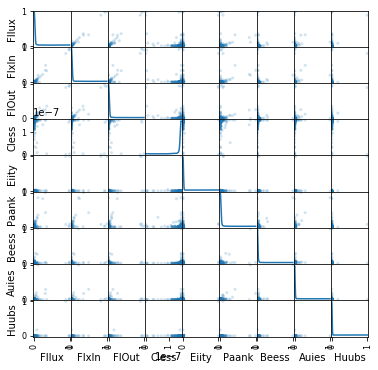

In [5]:

from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
show()

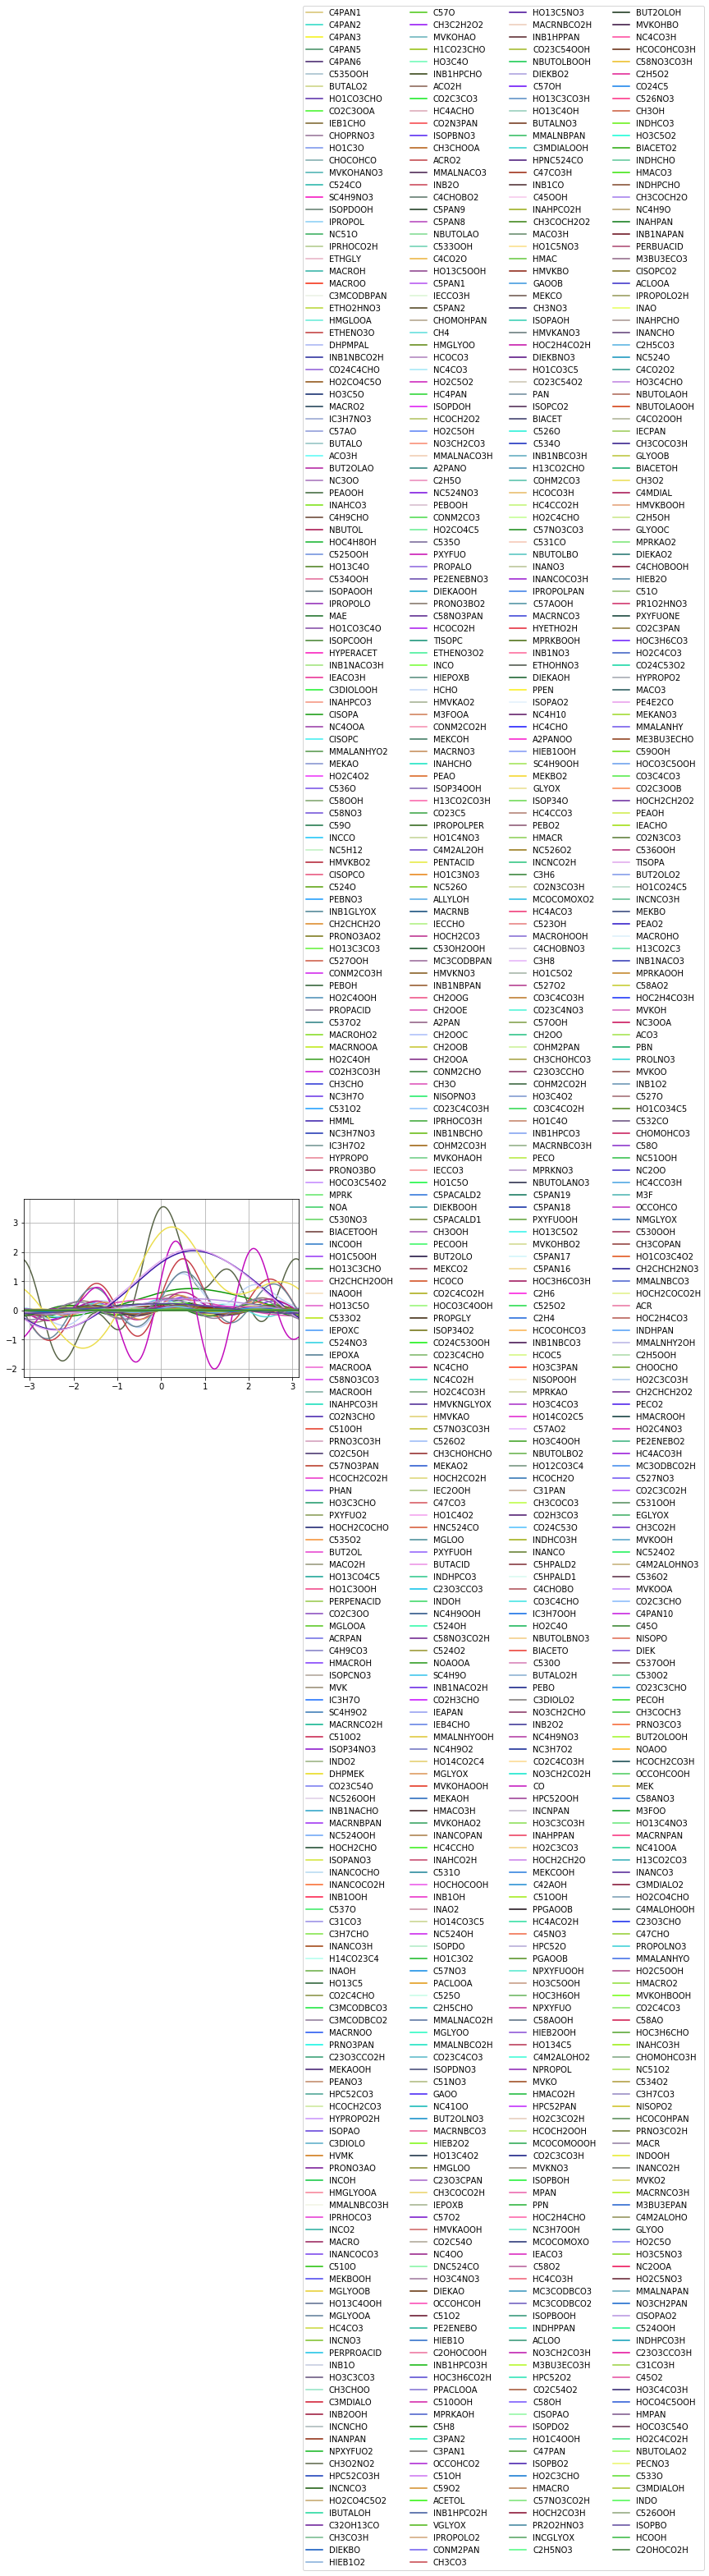

'Andrews curves allow one to plot multivariate data as a large number of curves that are created\nusing the attributes of samples as coefficients for Fourier series. By coloring these curves \ndifferently for each class it is possible to visualize data clustering. Curves belonging to samples\nof the same class will usually be closer together and form larger structures.'

In [6]:
from pandas.plotting import andrews_curves
andrews_curves(df,'Names')
legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol = 4)
show()
'''Andrews curves allow one to plot multivariate data as a large number of curves that are created
using the attributes of samples as coefficients for Fourier series. By coloring these curves 
differently for each class it is possible to visualize data clustering. Curves belonging to samples
of the same class will usually be closer together and form larger structures.'''''


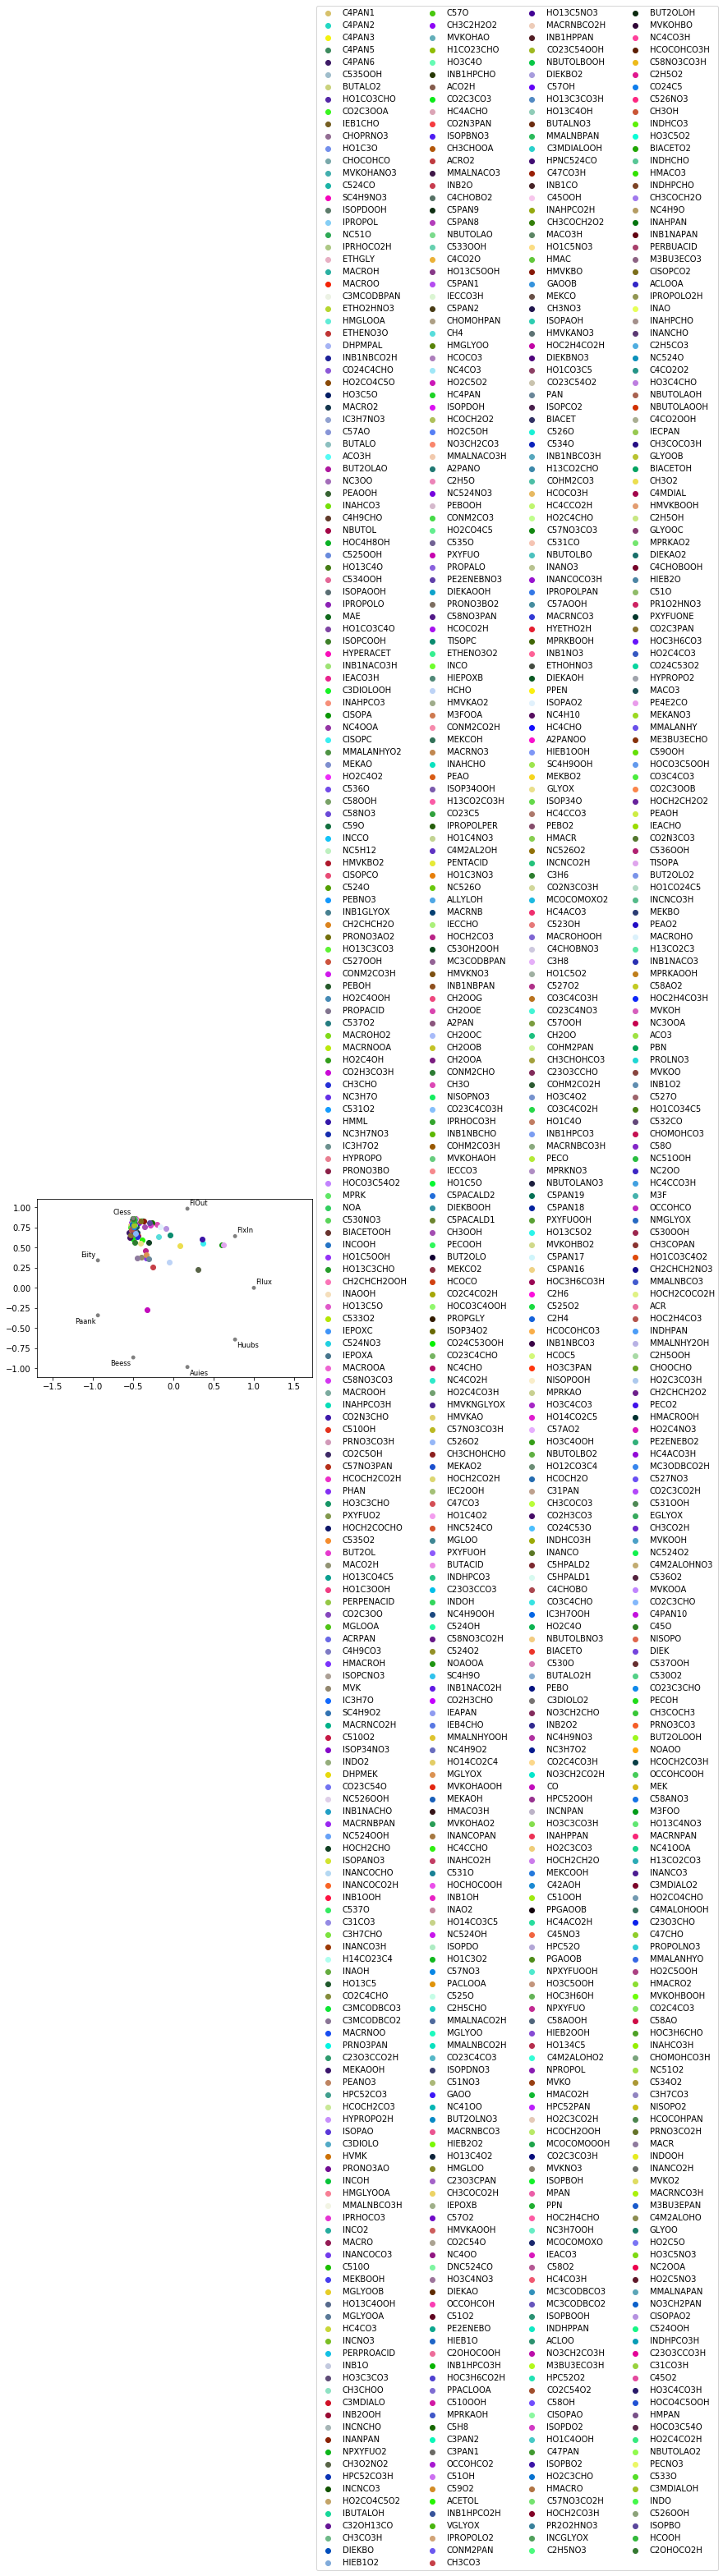

In [7]:
from pandas.plotting import radviz
radviz(df, 'Names')
legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol = 4)
show()

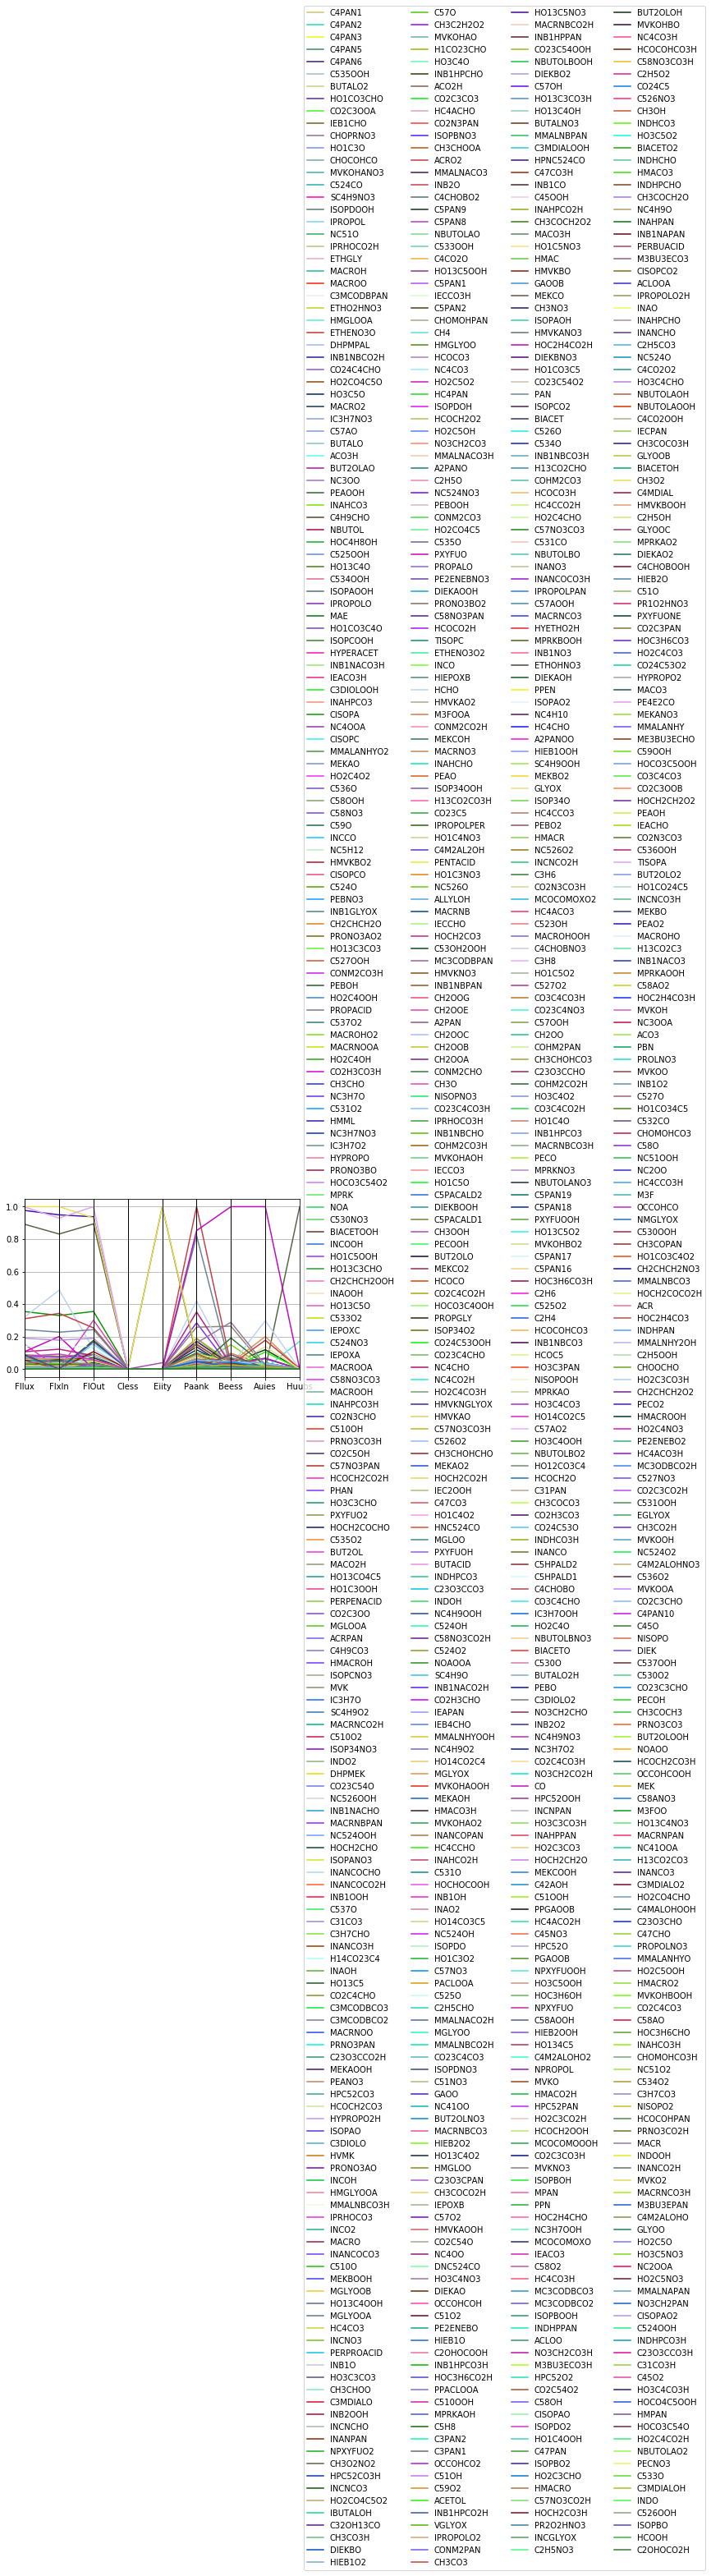

In [8]:
from pandas.plotting import parallel_coordinates
figure()
parallel_coordinates(df, 'Names')
legend(loc='center left', bbox_to_anchor=(1.0, 0.5),ncol = 4)
show()

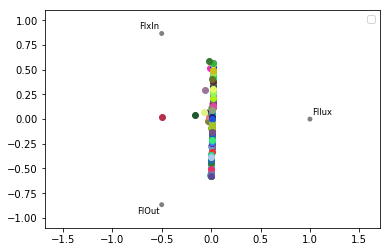

In [9]:
radviz(df[df.columns[:4]], 'Names')
legend([])
show()

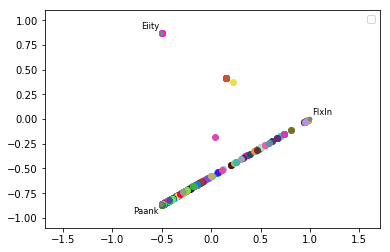

In [10]:
radviz(df[['FlxIn','Eiity','Paank','Names']], 'Names')
legend([])
show()

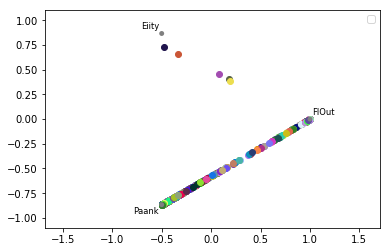

In [11]:
radviz(df[['FlOut','Eiity','Paank','Names']], 'Names')
legend([])
show()

In [12]:
d = []
for i in df.columns[1:]:
    b=df[i]
    b=b.sort_values(ascending=False)
    c = list(b.iloc[:10].index)
    d.extend(c)
    print i, c

print ''
print  'reoccuring', set(d)

print ''
print 'repeats', (len(d) - len(set(d)))/float(len(d))*100,'%'

Fllux ['CH3O2', 'TISOPA', 'ISOPBO2', 'CH3O2NO2', 'CISOPA', 'HCHO', 'CH3CO3', 'PAN', 'CISOPAO2', 'CH3O']
FlxIn ['CH3O2', 'ISOPBO2', 'TISOPA', 'CH3O2NO2', 'HCHO', 'CH3CO3', 'CISOPA', 'PAN', 'CO', 'CISOPAO2']
FlOut ['TISOPA', 'ISOPBO2', 'CH3O2', 'CH3O2NO2', 'CISOPA', 'CH3O', 'CH3CO3', 'PAN', 'CISOPAO2', 'C5H8']
Cless ['CO', 'MVKOH', 'HMGLOOA', 'HOCH2CO3', 'HOCH2CHO', 'HMGLOO', 'HOCH2COCO2H', 'HCHO', 'HOCH2COCHO', 'HO3C4CHO']
Eiity ['CH3O2', 'CH3O2NO2', 'CH3OOH', 'HCHO', 'CH3O', 'CH3OH', 'CH3NO3', 'CO', 'MVK', 'MACR']
Paank ['CH3CO3', 'CO', 'PAN', 'HCHO', 'HOCH2CO3', 'PHAN', 'MVK', 'MGLYOX', 'CO2C3CO3', 'CO2H3CO3']
Beess ['CO', 'MACR', 'MVK', 'C3H6', 'MACROHO2', 'MACRNO3', 'C532CO', 'MVKNO3', 'CONM2CHO', 'PRONO3AO2']
Auies ['CO', 'HCHO', 'MGLYOX', 'CH3CO3', 'GLYOX', 'HOCH2CHO', 'ACETOL', 'HOCH2CO3', 'CH3CHO', 'HMVKANO3']
Huubs ['CH3O2NO2', 'CH4', 'CH3OOH', 'CH3C2H2O2', 'CH3CO3', 'CH3CO2H', 'CH3CO3H', 'CH3CHO', 'MC3CODBCO2', 'CH3O']

reoccuring set(['HCHO', 'HOCH2CHO', 'CO2C3CO3', 'CH3C2H2O